In [40]:
# Imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import quantstats as qs
%matplotlib inline

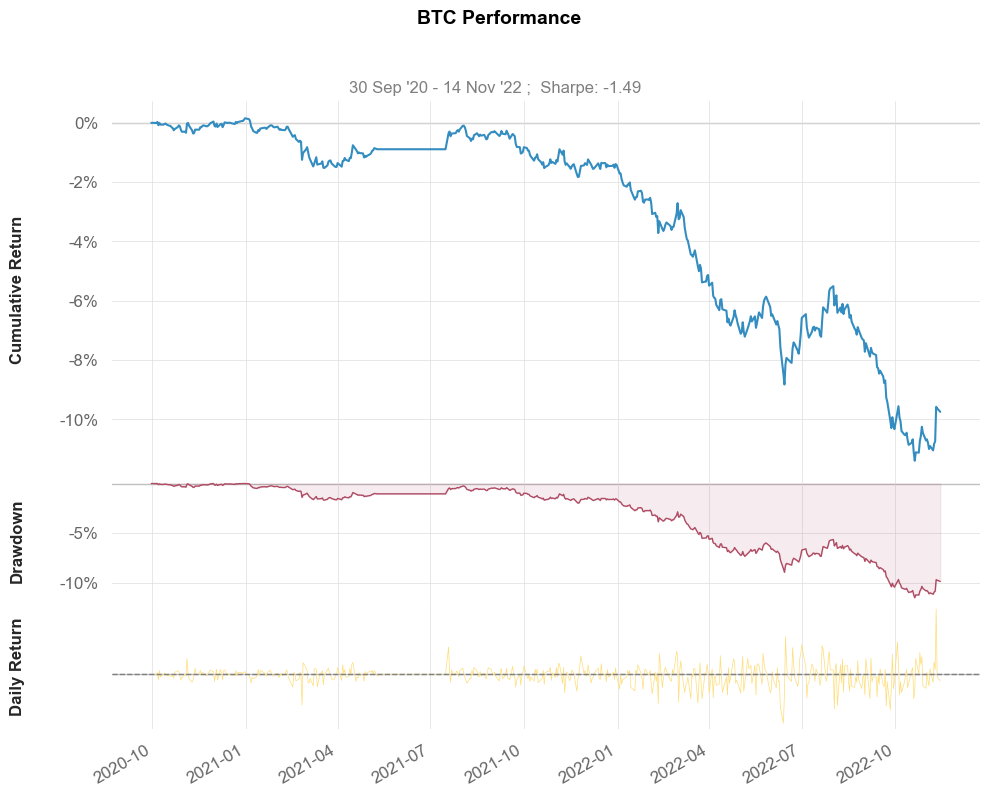

In [41]:
# Creating Charts from a quantstats library
# From library extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('BTC')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas()
stock.sharpe()

# Plot 
qs.plots.snapshot(stock, title='BTC Performance')

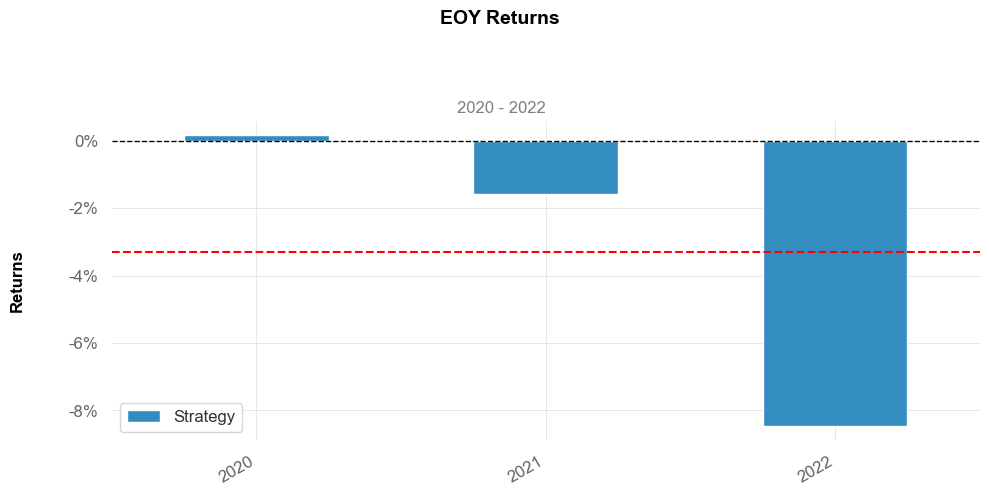

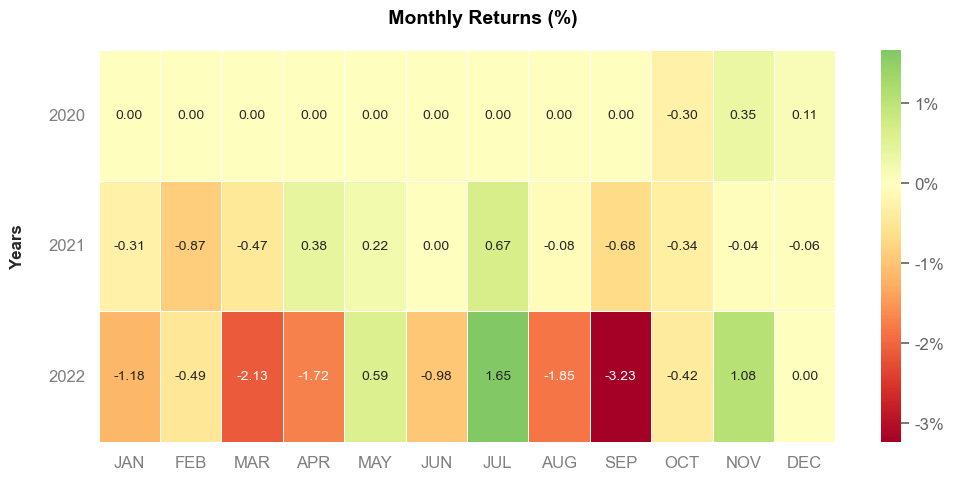

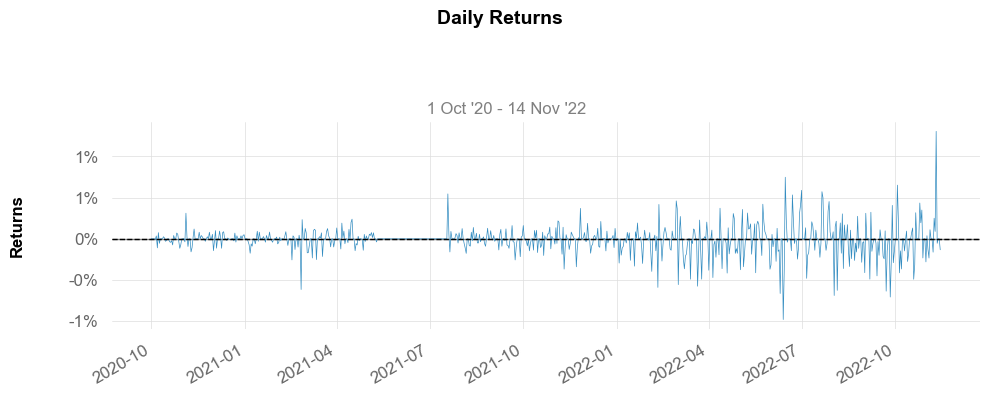

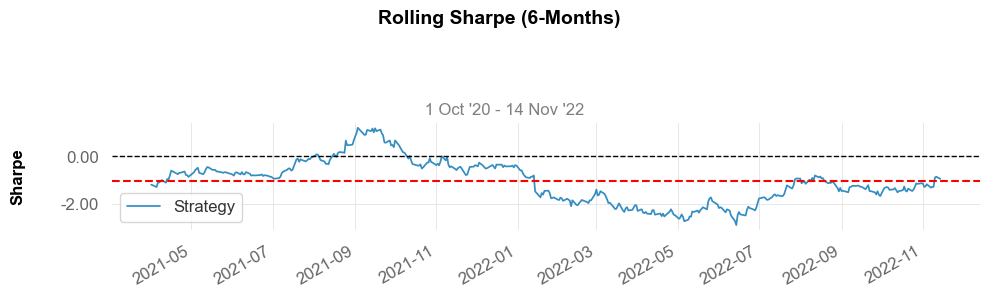

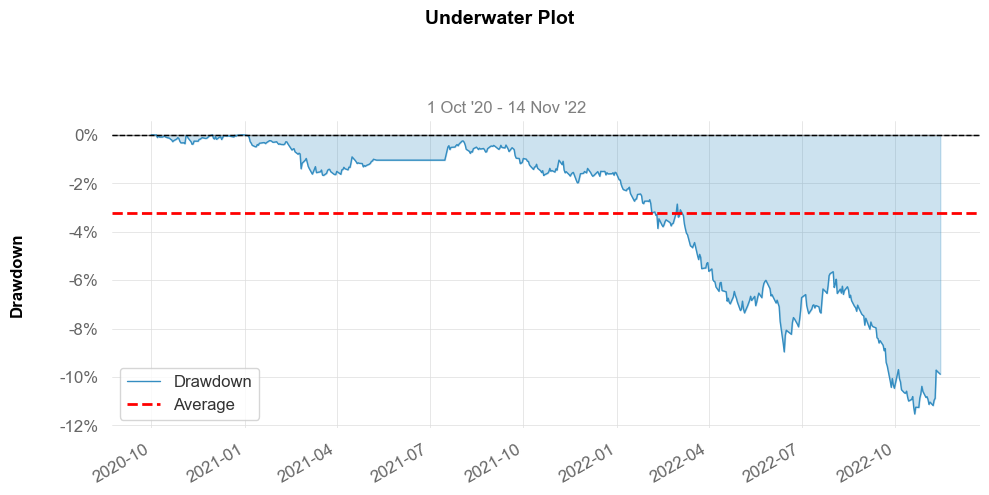

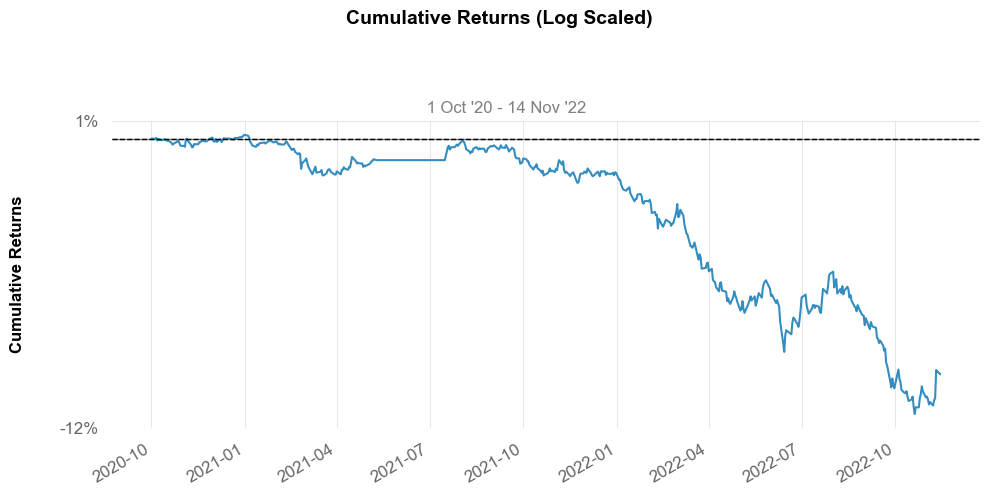

In [42]:
# Create 6 charts from the quantstats
qs.plots.yearly_returns(stock)
qs.plots.monthly_heatmap(stock)
qs.plots.daily_returns(stock)
qs.plots.rolling_sharpe(stock)
qs.plots.drawdown(stock)
qs.plots.log_returns(stock)


In [43]:
# Load .env enviroment variables
load_dotenv()

True

In [44]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [45]:
# Pulling Crypto Information and store in datframe
# Format current date as ISO format
today = pd.Timestamp("2021-1-1", tz="America/New_York").isoformat()

# Set the tickers BTCUSD (bitcoin), ETHUSD (Ethereum), and TRXUSD (Tron)
tickers = ["BTCUSD", "ETHUSD","TRXUSD"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for crypto

df_crypto = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = today
).df


In [46]:
# Reorganize the crypto DataFrame and clean up data
# 
BTC = df_crypto[df_crypto['symbol']=='BTCUSD'].drop('symbol', axis=1)
BTC['BTC Return'] = BTC['close'].pct_change()
BTC = BTC.drop(columns= ['exchange','open','volume', 'trade_count', 'vwap'])

ETH = df_crypto[df_crypto['symbol']=='ETHUSD'].drop('symbol', axis=1)
ETH['ETH Return'] = ETH['close'].pct_change()
ETH = ETH.drop(columns= ['exchange','open','volume', 'trade_count', 'vwap'])

TRX = df_crypto[df_crypto['symbol']=='TRXUSD'].drop('symbol', axis=1)
TRX['TRX Return'] = TRX['close'].pct_change()
TRX = TRX.drop(columns= ['exchange','open','volume', 'trade_count', 'vwap'])

# Concatenate the ticker DataFrames
df_crypto = pd.concat([BTC, ETH, TRX],axis=1, keys=['BTC','ETH', 'TRX']).dropna()

df_crypto.head()

BTC                                     ETH  \
                               high       low     close BTC Return     high   
timestamp                                                                     
2021-01-26 06:00:00+00:00  32584.62  31420.69  31551.72  -0.022773  1375.91   
2021-01-26 06:00:00+00:00  32830.00  30900.00  31526.00  -0.000815  1372.00   
2021-01-27 06:00:00+00:00  31936.16  29200.00  30407.13  -0.035490  1312.56   
2021-01-27 06:00:00+00:00  31719.00  29275.00  31622.00   0.039953  1304.20   
2021-01-28 06:00:00+00:00  34433.04  32729.00  33052.81   0.045247  1378.00   

                                                             TRX            \
                               low    close ETH Return      high       low   
timestamp                                                                    
2021-01-26 06:00:00+00:00  1276.00  1286.15  -0.041474  0.029550  0.028700   
2021-01-26 06:00:00+00:00  1245.00  1282.00  -0.003227  0.029550  0.028700   
2021-01-27 06:00:00+00:00  1206.05  1240.96  -0.032012  0.028735  0.028385   
2021-01-27 06:00:00+00:00  1220.00  1304.20   0.050961  0.028735  0.028385   
2021-01-28 06:00:00+00:00  1286.56  1305.38   0.000905  0.030818  0.029510   

                                                
                              close TRX Return  
timestamp                                       
2021-01-26 06:00:00+00:00  0.028700  -0.030815  
2021-01-26 06:00:00+00:00  0.028700  -0.030815  
2021-01-27 06:00:00+00:00  0.028735   0.001220  
2021-01-27 06:00:00+00:00  0.028735   0.001220  
2021-01-28 06:00:00+00:00  0.030818   0.072473

In [47]:
# Pulling Stock Information and store in datframe
# Format current date as ISO format
today = pd.Timestamp("2021-1-24", tz="America/New_York").isoformat()

# Set the stock_tickers to TSLA , GME, and SPY
stock_tickers = ["TSLA", "GME","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and GOOGL
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock = alpaca.get_bars(
    stock_tickers,
    timeframe,
    start = today
).df

In [48]:
# Reorganize the stocd DataFrame
# Separate ticker data
TSLA = df_stock[df_stock['symbol']=='TSLA'].drop('symbol', axis=1)
TSLA['TSLA Return'] = TSLA['close'].pct_change().dropna()
TSLA = TSLA.drop(columns= ['open','volume', 'trade_count', 'vwap'])

GME = df_stock [df_stock['symbol']=='GME'].drop('symbol', axis=1)
GME['GME Return'] = GME['close'].pct_change().dropna()
GME = GME.drop(columns= ['open','volume', 'trade_count', 'vwap'])

SPY = df_stock [df_stock['symbol']=='SPY'].drop('symbol', axis=1)
SPY['SPY Return'] = SPY['close'].pct_change().dropna()
SPY = SPY.drop(columns= ['open','volume', 'trade_count', 'vwap'])

# Concatenate the ticker DataFrames
df_stock = pd.concat([TSLA, GME, SPY],axis=1, keys=['TSLA','GME', 'SPY']).dropna()
df_stock.head()

TSLA                                   GME  \
                             high       low   close TSLA Return    high   
timestamp                                                                 
2021-01-26 05:00:00+00:00  895.90  871.6000  883.09    0.002600  150.00   
2021-01-27 05:00:00+00:00  891.50  858.6600  864.16   -0.021436  380.00   
2021-01-28 05:00:00+00:00  848.00  801.0000  835.43   -0.033246  483.00   
2021-01-29 05:00:00+00:00  842.41  780.1000  793.53   -0.050154  413.98   
2021-02-01 05:00:00+00:00  842.00  795.5601  839.81    0.058322  322.00   

                                                         SPY                   \
                              low   close GME Return    high      low   close   
timestamp                                                                       
2021-01-26 05:00:00+00:00   80.20  147.98   0.927074  385.85  383.540  383.75   
2021-01-27 05:00:00+00:00  249.00  347.51   1.348358  380.32  372.010  374.65   
2021-01-28 05:00:00+00:00  112.25  193.60  -0.442894  381.93  375.890  377.52   
2021-01-29 05:00:00+00:00  250.00  325.00   0.678719  376.67  368.270  370.14   
2021-02-01 05:00:00+00:00  212.00  225.00  -0.307692  377.34  370.376  376.02   

                                      
                          SPY Return  
timestamp                             
2021-01-26 05:00:00+00:00  -0.002054  
2021-01-27 05:00:00+00:00  -0.023713  
2021-01-28 05:00:00+00:00   0.007660  
2021-01-29 05:00:00+00:00  -0.019549  
2021-02-01 05:00:00+00:00   0.015886

In [49]:
# Drawdown chart

# Trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
roll_max = df_crypto['BTC']['close'].rolling(window, min_periods=1).max()
daily_drawdown = df_crypto['BTC']['close']/roll_max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
d = daily_drawdown.hvplot(legend = False, hover_color = "yellow")
md = max_daily_drawdown.hvplot(title = "BTC Max Daily Drawdown", legend= False, hover_color = "green")

#overlay both daily drawdown and max daily drawdown
d*md

:Overlay
   .Curve.Close.I  :Curve   [timestamp]   (close)
   .Curve.Close.II :Curve   [timestamp]   (close)

In [50]:
#Combine crypto and stock returns
df_crypto_return =  pd.concat([df_crypto['BTC']['BTC Return'], df_crypto['ETH']['ETH Return'],df_crypto['TRX']['TRX Return']], axis=1)
df_stock_return = pd.concat([df_stock['TSLA']['TSLA Return'], df_stock['GME']['GME Return'], df_stock['SPY']['SPY Return']], axis =1)

# Calculate the log return
df_log_return = np.log(1 + df_crypto_return)
df_log_return_stock = np.log(1 + df_stock_return)

# overlay the two charts
crypto_log = df_log_return.hvplot(title = "Log Daily Return")
stock_log = df_log_return_stock.hvplot()
stock_log * crypto_log

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)

In [51]:
# Display Crypto and Stock
display(df_crypto_return.tail())
display(df_stock_return.tail())

,BTC Return,ETH Return,TRX Return
timestamp,,,
2022-11-14 06:00:00+00:00,0.000001,0.000465,0.075594
2022-11-14 06:00:00+00:00,-0.000800,0.000297,0.075594
2022-11-15 06:00:00+00:00,0.010205,0.000561,0.012048
2022-11-15 06:00:00+00:00,-0.000128,0.000465,0.012048
2022-11-15 06:00:00+00:00,-0.000220,0.000473,0.012048


,TSLA Return,GME Return,SPY Return
timestamp,,,
2022-11-09 05:00:00+00:00,-0.071668,-0.080748,-0.020602
2022-11-10 05:00:00+00:00,0.073934,0.076590,0.054954
2022-11-11 05:00:00+00:00,0.027527,0.049035,0.009678
2022-11-14 05:00:00+00:00,-0.025616,-0.001916,-0.008507
2022-11-15 05:00:00+00:00,0.018382,0.059117,0.008529


In [52]:
# Plot the daily returns
c = df_crypto_return.hvplot(kind="line", title = "Daily Returns")
s = df_stock_return.hvplot(kind="line")
c * s

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)

In [53]:
#Calculate cumulative returns for crypto and stocks
df_cumulative_returns = (1 + df_crypto_return).cumprod()
df_cumulative_stock_returns = (1 + df_stock_return).cumprod()


# Plot the chart
c = df_cumulative_returns.hvplot(title = "Cumulative Returns")
s = df_cumulative_stock_returns.hvplot()
c*s

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)

In [54]:
#Plot box chart
c = df_crypto_return.hvplot.box( title = "Daily Return Box", legend = False)
s = df_stock_return.hvplot.box(legend = False)
c*s

:Overlay
   .BoxWhisker.I  :BoxWhisker   [Variable]   (value)
   .BoxWhisker.II :BoxWhisker   [Variable]   (value)

In [55]:
#calculate STDs
all_stds = df_crypto_return.std()
stock_stds = df_stock_return.std()
all_stds = pd.concat([all_stds, stock_stds], axis=0)
all_stds.hvplot.bar(legend = False, title = "STDs")

:Bars   [index]   (0)

In [56]:
#Volatity
volatility = all_stds * np.sqrt(365)
volatility.hvplot.line(title = "Volatility")

:Curve   [index]   (0)

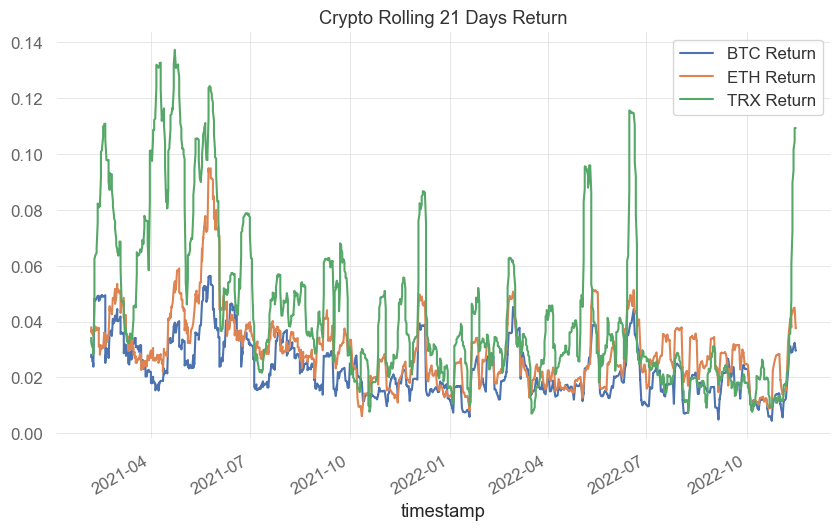

In [57]:
#Plot rolling window
rolling_21 = df_crypto_return.rolling(window=21).std().plot(title = "Crypto Rolling 21 Days Return")

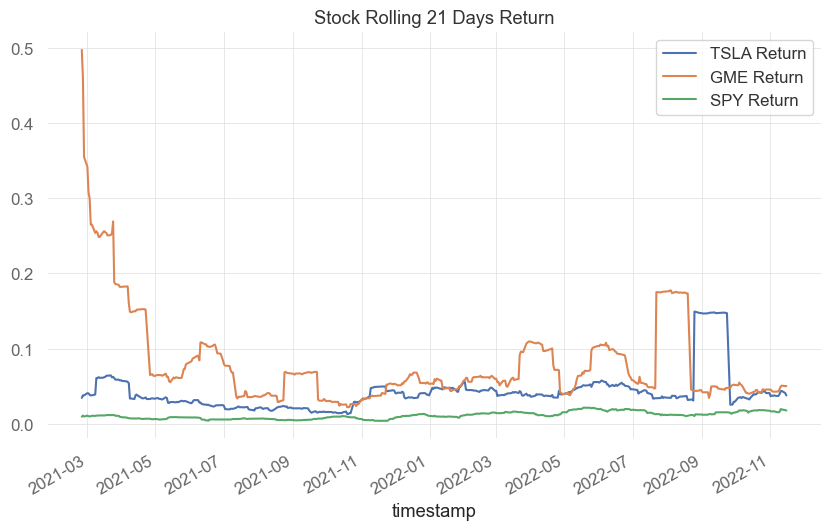

In [58]:
#Plot rolling
rolling_21 = df_stock_return.rolling(window=21).std().plot(title = "Stock Rolling 21 Days Return")

<AxesSubplot:>

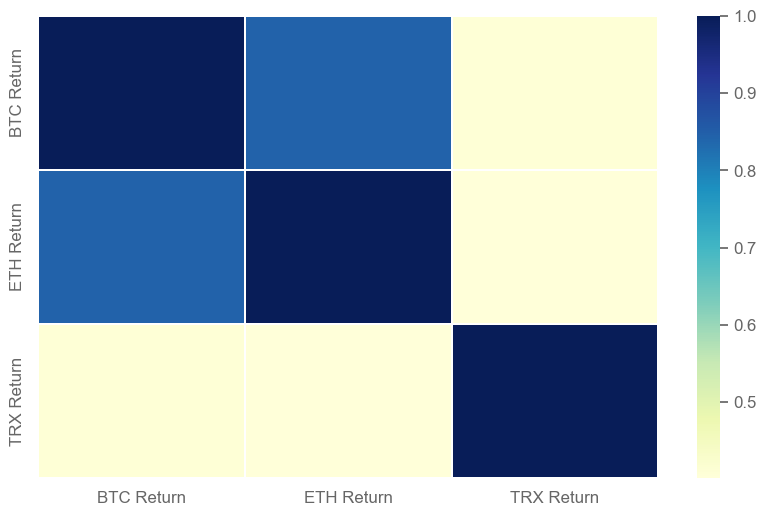

In [59]:
#Calculate correlation and plot heatmap

#correlation = pd.concat([df_crypto_return,df_stock_return], axis=1)
display(sns.heatmap(df_crypto_return.corr(), cmap ="YlGnBu", linewidths = 0.1))




<AxesSubplot:>

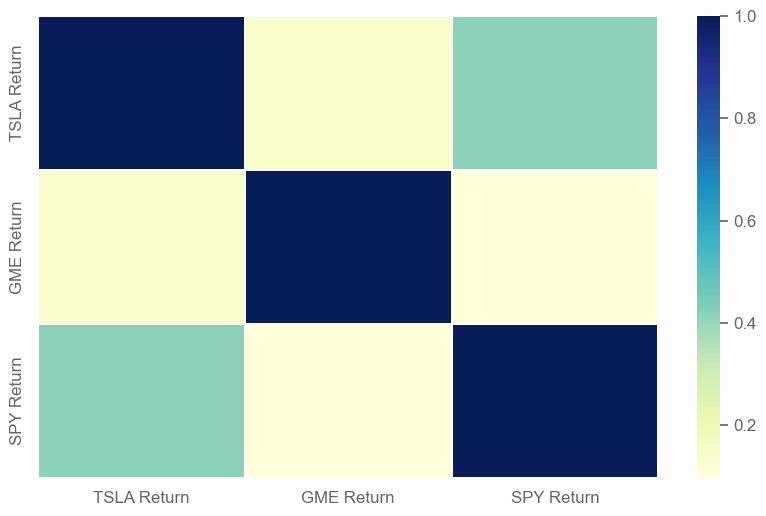

In [60]:
# Correlations
display(sns.heatmap(df_stock_return.corr(), cmap ="YlGnBu", linewidths = 0.1))

<AxesSubplot:title={'center':'GME 21-Day Rolling Covariance vs SP500'}, xlabel='timestamp'>

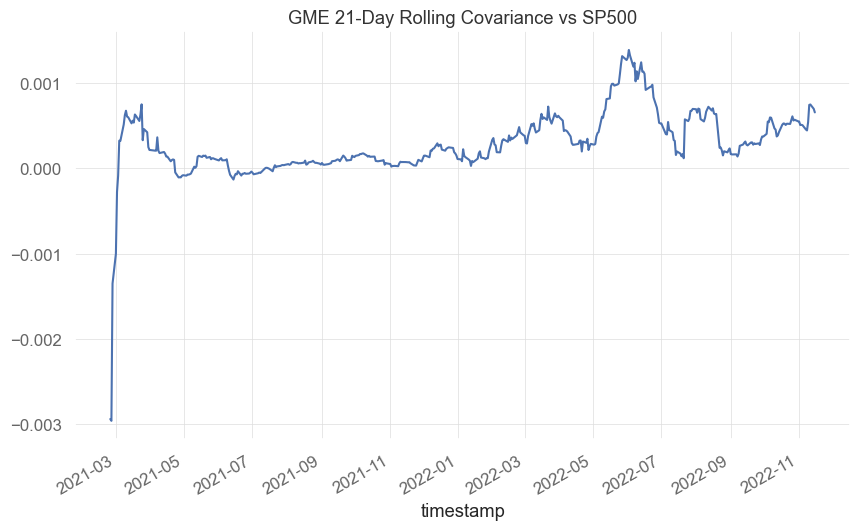

In [61]:
#Calculate GME Rolling Covariance vs SP500
covariance = df_stock_return['GME Return'].cov(df_stock_return['SPY Return'])

variance = df_stock_return['SPY Return'].var()
GME_beta = covariance / variance
rolling_covariance = df_stock_return['GME Return'].rolling(window=21).cov(df_stock_return['SPY Return'])
rolling_covariance.plot(title="GME 21-Day Rolling Covariance vs SP500")

<AxesSubplot:title={'center':'TRX 21-Day Rolling Covariance vs ETH'}, xlabel='timestamp'>

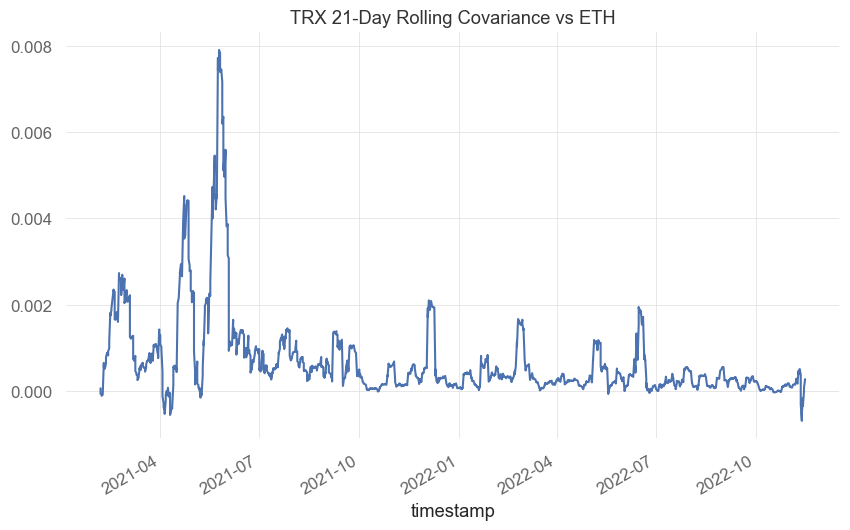

In [62]:
# Calculate the covariance for TRX and ETH
covariance2 = df_crypto_return['TRX Return'].cov(df_crypto_return['ETH Return'])

variance2 = df_crypto_return['ETH Return'].var()
TRX_beta2 = covariance2 / variance2
rolling_covariance2 = df_crypto_return['TRX Return'].rolling(window=21)

rolling_covariance2 = df_crypto_return['TRX Return'].rolling(window=21).cov(df_crypto_return['ETH Return'])

#Plot the chart
rolling_covariance2.plot(title="TRX 21-Day Rolling Covariance vs ETH")

<AxesSubplot:xlabel='timestamp'>

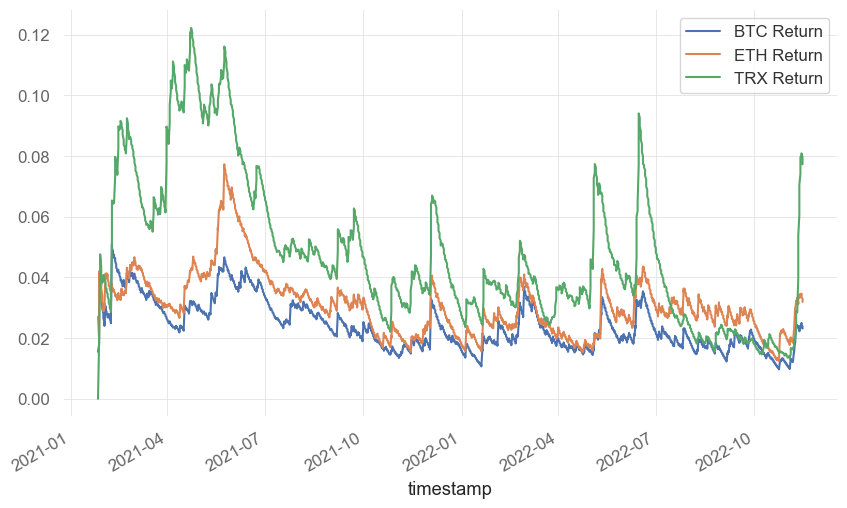

In [63]:
#Calculate ewm and plot it
ewm = df_crypto_return.ewm(halflife=21).std().dropna()
ewm.plot()

<AxesSubplot:title={'center':'BTC Rolling Sharpe - 6 Months'}, xlabel='timestamp'>

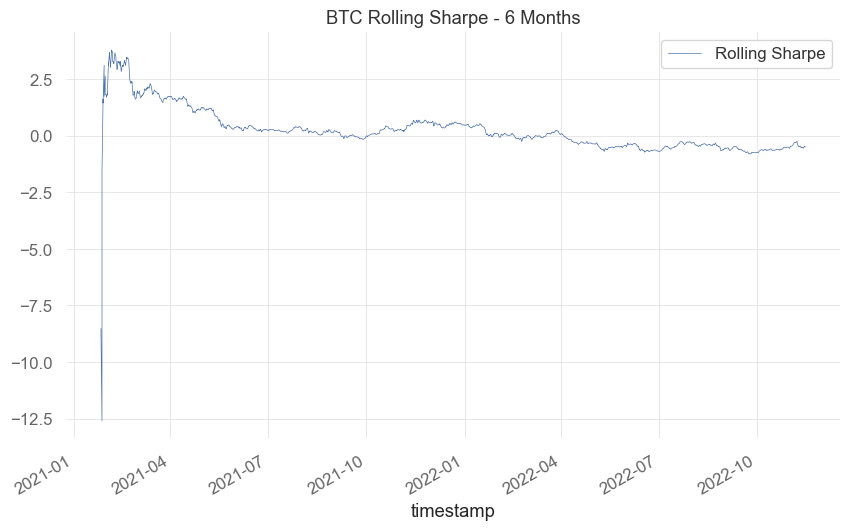

In [64]:
def my_rolling_sharpe(y):
    return np.sqrt(126) * (y.mean() / y.std()) # 21 days per month X 6 months = 126

df_c_return = pd.DataFrame()

df_c_return['Rolling Sharpe'] = df_crypto_return['BTC Return'].rolling('180d').apply(my_rolling_sharpe)

df_c_return.plot(y=['Rolling Sharpe'], linewidth=0.5, title = "BTC Rolling Sharpe - 6 Months")

<AxesSubplot:title={'center':'ETH Rolling Sharpe - 6 Months'}, xlabel='timestamp'>

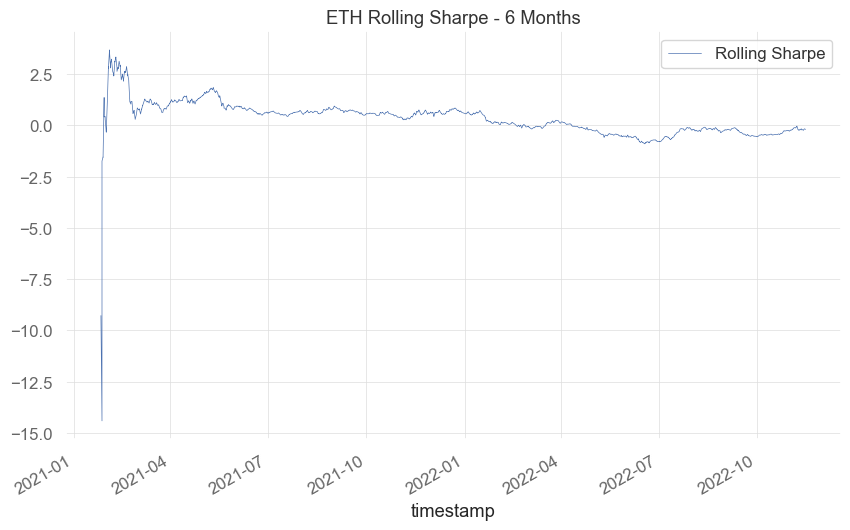

In [65]:
def my_rolling_sharpe(y):
    return np.sqrt(126) * (y.mean() / y.std()) # 21 days per month X 6 months = 126

df_e_return = pd.DataFrame()

df_e_return['Rolling Sharpe'] = df_crypto_return['ETH Return'].rolling('180d').apply(my_rolling_sharpe)

df_e_return.plot(y=['Rolling Sharpe'], linewidth=0.5, title = "ETH Rolling Sharpe - 6 Months")

In [66]:
# Calculate the Sharpe ratios
sharpe_crypto_ratios = (df_crypto_return.mean() * 252) / (df_crypto_return.std() * np.sqrt(252))
sharpe_stock_ratios = (df_stock_return.mean() * 252) / (df_stock_return.std() * np.sqrt(252))


# Plot Sharpe ratios for crypto and stocks
c = sharpe_crypto_ratios.hvplot.bar(title = "Sharpe Ratios", hover_fill_color="orange", legend = False)
s = sharpe_stock_ratios.hvplot.bar(hover_color= "orange", legend= False)
c*s

:Overlay
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)

In [67]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [74]:
import matplotlib.pyplot as plt
# Monthly returns
sp_data_daily_returns = df_stock['SPY']['close'].pct_change()
sp_data_monthly_returns = df_stock['SPY']['close'].resample('M').ffill().pct_change().dropna()
sp_data_yearly_returns =df_stock['TSLA']['close'].resample('A').ffill().pct_change().dropna()

#convert to Dataframe
sp_data_monthly_returns = pd.DataFrame(sp_data_monthly_returns)
sp_data_monthly_returns.index = sp_data_monthly_returns.index.date


sp_data_monthly_returns['year'] = pd.DatetimeIndex(sp_data_monthly_returns.index).year
sp_data_monthly_returns['month'] = pd.DatetimeIndex(sp_data_monthly_returns.index).month_name().astype(str)
sp_data_monthly_returns.set_index('year')

# Convert to year column to list and remove duplicate
year = sp_data_monthly_returns['year'].tolist()
year =[*set(year)]

# Convert to year month to list and remove duplicate
month = sp_data_monthly_returns['month'].tolist()
month = [*set(month)]

#close_array = sp_data_monthly_returns['close'].to_numpy().reshape(22,1)
ax.set_xticks(np.arange(len(month)), labels=month)
ax.set_yticks(np.arange(len(year)), labels=year)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(year)):
    for j in range(len(month)):
        text = ax.text(j, i, sp_data_monthly_returns.loc[sp_data_monthly_returns['year']==i, sp_data_monthly_returns['month'] == j], ha="center", va="center", color="w")
#fig.tight_layout()
#plt.show()
#size=list(plt.gcf().get_size_inches())
#figsize=(size[0], size[0] //2)
#ax=plt.subplots()
#fig, ax = plt.subplots()

#im = ax.imshow(sp_data_monthly_returns['close'])


#ax = sns.heatmap(close_array, annot=True, fmt="0.2f", linewidths=0.5)


#sp_data_monthly_returns.hvplot.heatmap(x_sampling=sp_data_monthly_returns['month'], y_sampling = sp_data_monthly_returns['year'])
#sns.heatmap(sp_data_monthly_returns, xtick=sp_data_monthly_returns.groupby('month'), ytick=sp_data_monthly_returns.groupby('year'), cmap='RdYlGn')


#sns.heatmap(per_change, annot=True, fmt="", cmap='RdYlGn', ax=ax)
#sp_data_monthly_returns.hvplot.heatmap(x= sp_data_monthly_returns['month'], y= sp_data_monthly_returns['year'])


#sns.heatmap(sp_data_monthly_returns, annot=True, fmt="", cmap='RdYlGn')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
__version__="0.0.11"
__author__="Ran Aroussi"
__all__=['get', 'plot']
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.base import PandasObject

def sum_returns(returns, groupby, compounded=True):
    defreturns_prod(data):
return(data+1).prod() -1

if compounded:
    return returns.groupby(groupby).apply(returns_prod)
return returns.groupby(groupby).sum()

def get(returns, eoy=False, is_prices=False, compounded=True):
    # get close / first column if given DataFrame
    if is instance(returns, pd.DataFrame):
        returns.columns=map(str.lower, returns.columns)
        if len(returns.columns) >1 and'close'inreturns.columns:
            returns = returns['close']
    else:
        returns = returns[returns.columns[0]]
# convert price data to returns
if is_prices:
    returns=returns.pct_change()
    original_returns=returns.copy()
# build monthly dataframe
# returns_index = returns.resample('MS').first().index
# returns_values = sum_returns(returns,
# [returns.index.year, returns.index.month]).values
# returns = pd.DataFrame(index=returns_index, data={
# 'Returns': returns_values})
# simpler, works with pandas 0.23.1
returns=pd.DataFrame(sum_returns(returns,
returns.index.strftime('%Y-%m-01'),
compounded))
returns.columns=['Returns']
returns.index=pd.to_datetime(returns.index)

# get returnsframe
returns['Year'] =returns.index.strftime('%Y')
returns['Month'] =returns.index.strftime('%b')
# make pivot table
returns=returns.pivot('Year', 'Month', 'Returns').fillna(0)

# handle missing months
for month in['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
if month not in returns.columns:
    returns.loc[:, month] =0
# order columns by month
returns=returns[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
if eoy:
returns['eoy'] =sum_returns(original_returns, original_returns.index.year).values
return returns

def plot(returns,
title="Monthly Returns (%)\n",
title_color="black",
title_size=14,
annot_size=10,
figsize=None,
cmap='RdYlGn',
cbar=True,
square=False,
is_prices=False,
compounded=True,
eoy=False,
ax=None):
returns=get(returns, eoy=eoy, is_prices=is_prices, compounded=compounded)
returns*=100
if figsize is None and ax is None:
size=list(plt.gcf().get_size_inches())
figsize=(size[0], size[0] //2)
plt.close()
if ax is None:
fig, ax=plt.subplots(figsize=figsize)
ax=sns.heatmap(returns, ax=ax, annot=True, center=0,annot_kws={"size": annot_size},fmt="0.2f", linewidths=0.5,square=square, cbar=cbar, cmap=cmap)
ax.set_title(title, fontsize=title_size,color=title_color, fontweight="bold")
if ax is None:
fig.subplots_adjust(hspace=0)
plt.yticks(rotation=0)
plt.show()
plt.close()
return fig, ax
PandasObject.get_returns_heatmap=get
PandasObject.plot_returns_heatmap=plot
PandasObject.sum_returns=sum_returns
